In [1]:
import pandas as pd
import numpy as np
import os, glob
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

In [149]:
filename = os.path.join(os.getcwd(), "final.txt")
#feature_list = list(df.iloc[:, 0:45].select_dtypes(include="float64"))

In [202]:
df = pd.read_table(filename, low_memory=False)

In [203]:
df.head()

,Unnamed: 0,ac_id,visited_page,diff_dates,Max Date Diff,Min Date Diff,Purchase 30_x,Purchase 60_x,Purchase 90_x,Purchase 120_x,...,arr_ind_21,arr_ind_22,arr_ind_23,arr_ind_24,arr_ind_25,arr_ind_26,arr_ind_27,arr_ind_28,arr_ind_29,arr_ind_30
0,0,ACe761e40e-3259-4e4f-93f9-8f2f2ed34388,REWARDS,52 days,380 days,31 days,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1,AC612ca133-52a6-456d-a978-e6ecfa9e87d6,PRICINGENGINE,155 days,386 days,91 days,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,2,AC200056f5-32de-4cbd-927d-278f3ee18282,PRICINGENGINE,257 days,336 days,5 days,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,3,AC200056f5-32de-4cbd-927d-278f3ee18282,PRICINGENGINE,209 days,336 days,5 days,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,4,AC4c2519a1-4934-47e6-8c22-2ccfa240b586,MYACCOUNT,246 days,379 days,7 days,0.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [204]:
df.shape

(498668, 67)

In [205]:
df.drop(columns=df.columns[0], axis=1, inplace=True)
df

,ac_id,visited_page,diff_dates,Max Date Diff,Min Date Diff,Purchase 30_x,Purchase 60_x,Purchase 90_x,Purchase 120_x,Purchase 180_x,...,arr_ind_21,arr_ind_22,arr_ind_23,arr_ind_24,arr_ind_25,arr_ind_26,arr_ind_27,arr_ind_28,arr_ind_29,arr_ind_30
0,ACe761e40e-3259-4e4f-93f9-8f2f2ed34388,REWARDS,52 days,380 days,31 days,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,AC612ca133-52a6-456d-a978-e6ecfa9e87d6,PRICINGENGINE,155 days,386 days,91 days,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,AC200056f5-32de-4cbd-927d-278f3ee18282,PRICINGENGINE,257 days,336 days,5 days,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,AC200056f5-32de-4cbd-927d-278f3ee18282,PRICINGENGINE,209 days,336 days,5 days,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,AC4c2519a1-4934-47e6-8c22-2ccfa240b586,MYACCOUNT,246 days,379 days,7 days,0.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498663,ACdc6643c3-55a3-4f1b-b07a-fd486c85fb2f,PRICINGENGINE,38 days,327 days,3 days,0.0,0.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
498664,AC8d97243d-d43d-4f68-bf7f-30d07c485a54,REWARDS,88 days,224 days,5 days,0.0,0.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
498665,AC762d9492-ad39-4d14-888a-8ac279982d85,PRICINGENGINE,223 days,349 days,47 days,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
498666,AC043ad7c3-807f-4f92-9c31-3161b69e1994,REWARDS,335 days,376 days,27 days,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [206]:
feature_list = list(df.iloc[:, 0:38].select_dtypes(include="float64"))
feature_list

['Purchase 30_x',
 'Purchase 60_x',
 'Purchase 90_x',
 'Purchase 120_x',
 'Purchase 180_x',
 'Purchase 360_x',
 'Web 30_x',
 'Web 60_x',
 'Web 90_x',
 'Web 120_x',
 'Web 180_x',
 'Web 360_x',
 'Purchase 30_y',
 'Purchase 60_y',
 'Purchase 90_y',
 'Purchase 120_y',
 'Purchase 180_y',
 'Purchase 360_y',
 'Web 30_y',
 'Web 60_y',
 'Web 90_y',
 'Web 120_y',
 'Web 180_y',
 'Web 360_y',
 'new_account_indicator',
 'spend_active',
 'is_active_balance',
 'has_credit_limit_reached',
 'is_revolving',
 'has_spend_at_any_merchant',
 'arr_ind_1',
 'arr_ind_2']

In [207]:
y = df.loc[:,"arr_ind_3"]
X = df.loc[:,feature_list]

In [110]:
y

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
498663    0.0
498664    1.0
498665    0.0
498666    0.0
498667    0.0
Name: arr_ind_3, Length: 498668, dtype: float64

In [6]:
labels = []
labels.append('ac_id')
for i in range(1, 31):
    labels.append('arr_ind_' + str(i))

In [7]:
labels #1,20,30,40

['ac_id',
 'arr_ind_1',
 'arr_ind_2',
 'arr_ind_3',
 'arr_ind_4',
 'arr_ind_5',
 'arr_ind_6',
 'arr_ind_7',
 'arr_ind_8',
 'arr_ind_9',
 'arr_ind_10',
 'arr_ind_11',
 'arr_ind_12',
 'arr_ind_13',
 'arr_ind_14',
 'arr_ind_15',
 'arr_ind_16',
 'arr_ind_17',
 'arr_ind_18',
 'arr_ind_19',
 'arr_ind_20',
 'arr_ind_21',
 'arr_ind_22',
 'arr_ind_23',
 'arr_ind_24',
 'arr_ind_25',
 'arr_ind_26',
 'arr_ind_27',
 'arr_ind_28',
 'arr_ind_29',
 'arr_ind_30']

In [8]:
#y = df['arr_ind_20'] #repeat for every label

In [9]:
#X = df.drop(labels, axis = 1)

In [10]:
from sklearn.preprocessing import LabelBinarizer
#drop it from the df

In [11]:
X['diff_dates'] = LabelBinarizer().fit_transform(X['diff_dates'])

In [12]:
X['Max Date Diff'] = LabelBinarizer().fit_transform(X['Max Date Diff'])

In [13]:
X['Min Date Diff'] = LabelBinarizer().fit_transform(X['Min Date Diff'])

In [14]:
X['visited_page'] = LabelBinarizer().fit_transform(X['visited_page'])

In [15]:
X['Proximity to Payment Due Date'] = LabelBinarizer().fit_transform(X['Proximity to Payment Due Date'])

In [16]:
X.head()

,Unnamed: 0,visited_page,diff_dates,Max Date Diff,Min Date Diff,Purchase 30_x,Purchase 60_x,Purchase 90_x,Purchase 120_x,Purchase 180_x,...,Web 120_y,Web 180_y,Web 360_y,new_account_indicator,spend_active,is_active_balance,has_credit_limit_reached,is_revolving,has_spend_at_any_merchant,Proximity to Payment Due Date
0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,11.0,0.0,1.0,0.0,0.0,1.0,0.0,0
1,1,0,0,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,1.0,1.0,0.0,0.0,0.0,0
2,2,0,0,0,0,0.0,0.0,0.0,0.0,0.0,...,10.0,10.0,10.0,0.0,1.0,0.0,0.0,0.0,0.0,1
3,3,0,0,0,0,0.0,0.0,0.0,0.0,0.0,...,10.0,10.0,10.0,0.0,1.0,0.0,0.0,0.0,0.0,1
4,4,1,0,0,0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [17]:
from sklearn import preprocessing

In [18]:
le = preprocessing.LabelEncoder()

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1234)

In [69]:
X_train.head()

,Purchase 30_x,Purchase 60_x,Purchase 90_x,Purchase 120_x,Purchase 180_x,Purchase 360_x,Web 30_x,Web 60_x,Web 90_x,Web 120_x,...,Web 180_y,Web 360_y,new_account_indicator,spend_active,is_active_balance,has_credit_limit_reached,is_revolving,has_spend_at_any_merchant,arr_ind_1,arr_ind_2
13652,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,7.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37593,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,22.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
90188,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,7.0,14.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
81447,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,8.0,16.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
167091,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,36.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [70]:
X_train.shape

(334107, 32)

In [71]:
X_train.head()

,Purchase 30_x,Purchase 60_x,Purchase 90_x,Purchase 120_x,Purchase 180_x,Purchase 360_x,Web 30_x,Web 60_x,Web 90_x,Web 120_x,...,Web 180_y,Web 360_y,new_account_indicator,spend_active,is_active_balance,has_credit_limit_reached,is_revolving,has_spend_at_any_merchant,arr_ind_1,arr_ind_2
13652,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,7.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37593,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,22.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
90188,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,7.0,14.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
81447,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,8.0,16.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
167091,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,36.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [72]:
y_train

13652     0.0
37593     0.0
90188     0.0
81447     0.0
167091    0.0
         ... 
453836    0.0
384053    0.0
165158    0.0
451283    0.0
486191    0.0
Name: arr_ind_3, Length: 334107, dtype: float64

In [73]:
rf_20_model = RandomForestClassifier(criterion='entropy', n_estimators=20)

In [74]:
rf_20_model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=20)

In [75]:
rf_20_predictions = list(rf_20_model.predict_proba(X_test)[:,1])

In [76]:
[fpr_20, tpr_20, thresholds_20] = roc_curve(y_test, rf_20_predictions)

Plotting ROC Curve...


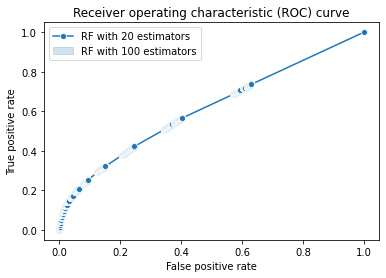

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
print('Plotting ROC Curve...')

fig = plt.figure()
ax = fig.add_subplot(111)


sns.lineplot(x=fpr_20, y=tpr_20, marker = 'o')
plt.title("Receiver operating characteristic (ROC) curve")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend(['RF with 20 estimators', 'RF with 100 estimators'])
plt.show()

In [78]:
from sklearn.ensemble import RandomForestRegressor

In [79]:
model = RandomForestRegressor(random_state=42)

In [85]:
rf_20_model.score(X_train, y_train)
rf_20_model.score(X_test, y_test)

0.9095229124762246

In [86]:
from sklearn.tree import plot_tree, export_text

In [87]:
plt.figure(figsize=(80,20))

<Figure size 5760x1440 with 0 Axes>

<Figure size 5760x1440 with 0 Axes>

[Text(0.5555555555555556, 0.875, 'X[12] <= 15.5\nentropy = 0.421\nsamples = 211331\nvalue = [305587, 28520]'),
 Text(0.3333333333333333, 0.625, 'X[22] <= 68.0\nentropy = 0.421\nsamples = 211206\nvalue = [305404, 28516]'),
 Text(0.2222222222222222, 0.375, 'X[14] <= 29.0\nentropy = 0.421\nsamples = 211204\nvalue = [305404, 28513]'),
 Text(0.1111111111111111, 0.125, '\n  (...)  \n'),
 Text(0.3333333333333333, 0.125, '\n  (...)  \n'),
 Text(0.4444444444444444, 0.375, 'entropy = 0.0\nsamples = 2\nvalue = [0, 3]'),
 Text(0.7777777777777778, 0.625, 'X[14] <= 39.0\nentropy = 0.149\nsamples = 125\nvalue = [183, 4]'),
 Text(0.6666666666666666, 0.375, 'X[8] <= 0.5\nentropy = 0.119\nsamples = 124\nvalue = [183, 3]'),
 Text(0.5555555555555556, 0.125, '\n  (...)  \n'),
 Text(0.7777777777777778, 0.125, '\n  (...)  \n'),
 Text(0.8888888888888888, 0.375, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]')]

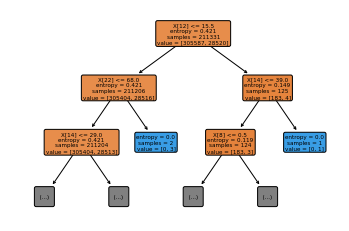

In [88]:
plot_tree(rf_20_model.estimators_[0], max_depth=2, filled=True, rounded=True)

In [89]:
rf_20_model.estimators_[0]

DecisionTreeClassifier(criterion='entropy', max_features='auto',
                       random_state=1003128426)

In [90]:
def test_params(param):
    model = RandomForestClassifier(criterion='entropy', n_estimators=param).fit(X_train, y_train)
    return model.score(X_train, y_train), model.score(X_test, y_test)


10
20
30
40
60
70
80


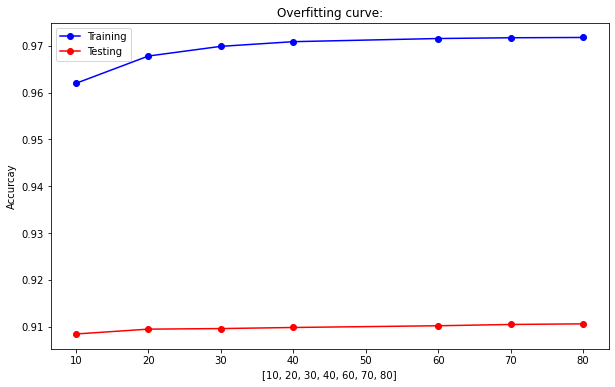

In [91]:
params = [10, 20, 30, 40, 60, 70, 80]
train_accs = []
test_accs = []
for param in params:
    print(param)
    train_acc, test_acc = test_params(param)
    train_accs.append(train_acc)
    test_accs.append(test_acc)
plt.figure(figsize=(10,6))
plt.title('Overfitting curve:')
plt.plot(params, train_accs, 'b-o')
plt.plot(params, test_accs, 'r-o')
plt.xlabel(params)
plt.ylabel('Accurcay')
plt.legend(['Training', 'Testing'])

In [92]:
#max_depth = 40

In [93]:
def test_params_on_max_depth(param):
    model = RandomForestClassifier(criterion='entropy', max_depth=param).fit(X_train, y_train)
    return model.score(X_train, y_train), model.score(X_test, y_test)


In [94]:
max_depths = [3, 5, 7, 8, 10, 15, 20]
train_accs = []
test_accs = []
for param in max_depths:
    print(param)
    train_acc, test_acc = test_params_on_max_depth(param)
    train_accs.append(train_acc)
    test_accs.append(test_acc)

3
5
7
8
10
15
20


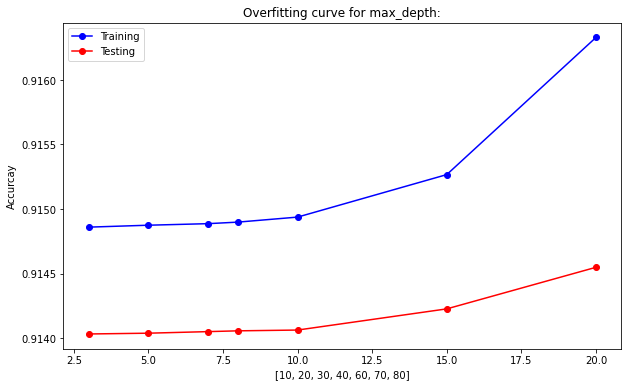

In [96]:
plt.figure(figsize=(10,6))
plt.title('Overfitting curve for max_depth:')
plt.plot(max_depths, train_accs, 'b-o')
plt.plot(max_depths, test_accs, 'r-o')
plt.xlabel(params)
plt.ylabel('Accurcay')
plt.legend(['Training', 'Testing'])

In [ ]:
# max_depth = 20

In [105]:
def test_params_on_min_samples_leaf(param):
    model = RandomForestClassifier(criterion='entropy', min_samples_leaf=param).fit(X_train, y_train)
    return model.score(X_train, y_train), model.score(X_test, y_test)

In [107]:
min_samples_leaf = [3, 5, 7, 8, 10]
train_accs = []
test_accs = []
for param in min_sample_leaves:
    print(param)
    train_acc, test_acc = test_params_on_min_samples_leaf(param)
    train_accs.append(train_acc)
    test_accs.append(test_acc)

3
5
7
8
10


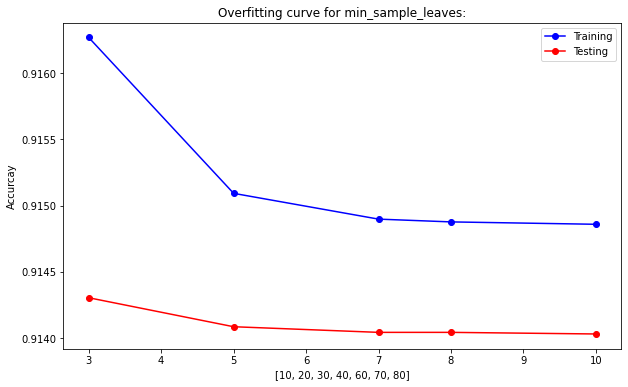

In [108]:
plt.figure(figsize=(10,6))
plt.title('Overfitting curve for min_sample_leaves:')
plt.plot(min_samples_leaf, train_accs, 'b-o')
plt.plot(min_samples_leaf, test_accs, 'r-o')
plt.xlabel(params)
plt.ylabel('Accurcay')
plt.legend(['Training', 'Testing'])

In [ ]:
# max_sample_leaves = 8

In [170]:
#model = RandomForestClassifier(criterion='entropy', n_estimators=40, max_depth=40, min_samples_leaf=8)

In [208]:
model = RandomForestClassifier(criterion='entropy', n_estimators=20)

In [209]:
y = df.loc[:,"arr_ind_3"]
X = df.loc[:,feature_list]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1234)
model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=20)

In [210]:
acc_3 = model.score(X_test, y_test)
print(acc_3)

0.90986321181811


In [211]:
feature_list = list(df.iloc[:, 0:45].select_dtypes(include="float64"))
feature_list

y = df.loc[:,"arr_ind_10"]
X = df.loc[:,feature_list]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1234)

In [212]:
model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=20)

In [213]:
acc_10 = model.score(X_test, y_test)
print(acc_10)

0.6101871038702973


In [214]:
feature_list = list(df.iloc[:, 0:55].select_dtypes(include="float64"))
feature_list

y = df.loc[:,"arr_ind_20"]
X = df.loc[:,feature_list]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1234)

In [215]:
model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=20)

In [216]:
acc_20 = model.score(X_test, y_test)
print(acc_20)

0.8488098638194955


In [217]:
feature_list = list(df.iloc[:, 0:64].select_dtypes(include="float64"))
feature_list

y = df.loc[:,"arr_ind_29"]
X = df.loc[:,feature_list]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1234)

In [218]:
model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=20)

In [219]:
acc_29 = model.score(X_test, y_test)
print(acc_29)

0.9863515656808114


In [220]:
print("\nAccuracy for Each Model")
print("Day 3: ",acc_3)
print("Day 10: ",acc_10)
print("Day 20: ",acc_20)
print("Day 29: ",acc_29)


Accuracy for Each Model
Day 3:  0.90986321181811
Day 10:  0.6101871038702973
Day 20:  0.8488098638194955
Day 29:  0.9863515656808114
